# ==========================================
# 1. Imports & Configuration
# ==========================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set plot style
sns.set_style("whitegrid")
# Display all columns when printing dataframe
pd.set_option('display.max_columns', None) # הצגת כל העמודות בהדפסה

# ==========================================
# 2. Define Column Names (NSL-KDD specific)
# ==========================================


In [3]:

# The original CSV files come without a header row.
# This list is based on the official KDD documentation.
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

# ==========================================
# 3. Load Data
# ==========================================


In [4]:
train_path = '../data/raw/KDDTrain+.txt'
test_path = '../data/raw/KDDTest+.txt'

print("Loading data...")
try:
    train_df = pd.read_csv(train_path, names=columns)
    test_df = pd.read_csv(test_path, names=columns)
    print("Data loaded successfully!")
    print(f"Train set shape: {train_df.shape}")
    print(f"Test set shape: {test_df.shape}")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please check that the files exist in the 'data/raw' directory.")

Loading data...
Data loaded successfully!
Train set shape: (125973, 43)
Test set shape: (22544, 43)


# ==========================================
# 4. Data Cleaning
# ==========================================

# --- Check for Missing Values (Nulls) ---


In [5]:
print("\n[1] Checking for Missing Values (Nulls)...")
train_nulls = train_df.isnull().sum().sum()
test_nulls = test_df.isnull().sum().sum()
print(f"Nulls in Train: {train_nulls}")
print(f"Nulls in Test: {test_nulls}")



[1] Checking for Missing Values (Nulls)...
Nulls in Train: 0
Nulls in Test: 0


# --- Check and Handle Duplicates ---


In [6]:
print("\n[2] Checking for Duplicates...")
dups_train = train_df.duplicated().sum()
print(f"Duplicates in Train (before cleaning): {dups_train}")

if dups_train > 0:
    train_df.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New Train shape: {train_df.shape}")
else:
    print("No duplicates found in Train set.")

# Note: It is often standard to leave the Test set untouched, 
# but for a clean project, we remove duplicates here as well.
dups_test = test_df.duplicated().sum()
if dups_test > 0:
    test_df.drop_duplicates(inplace=True)
    print(f"Duplicates removed from Test set: {dups_test}")


[2] Checking for Duplicates...
Duplicates in Train (before cleaning): 0
No duplicates found in Train set.


# --- Drop 'difficulty' Column ---

In [7]:
# The difficulty attribute was removed, 
# as it represents meta-information about sample complexity and is not intended for model training.

if 'difficulty' in train_df.columns:
    train_df.drop('difficulty', axis=1, inplace=True)
    test_df.drop('difficulty', axis=1, inplace=True)
    print("\n[3] Dropped 'difficulty' column.")


[3] Dropped 'difficulty' column.


# ==========================================
# 5. Exploratory Data Analysis (EDA)
# ==========================================

# --- Class Distribution (Normal vs Attack) ---


[4] Visualizing Class Distribution...


C:\Users\elair\AppData\Local\Temp\ipykernel_35928\1380246425.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='binary_label', data=train_df, palette=palette)


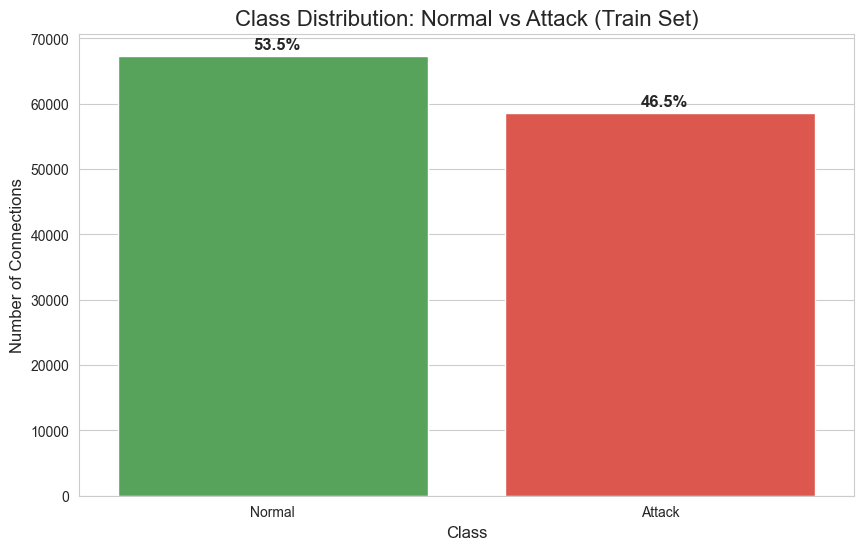

binary_label
Normal    67343
Attack    58630
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [8]:
print("\n[4] Visualizing Class Distribution...")

# Create a temporary helper column for visualization
train_df['binary_label'] = train_df['label'].apply(lambda x: 'Normal' if x == 'normal' else 'Attack')

plt.figure(figsize=(10, 6))
palette = {'Normal': '#4CAF50', 'Attack': '#F44336'}
ax = sns.countplot(x='binary_label', data=train_df, palette=palette)
plt.title('Class Distribution: Normal vs Attack (Train Set)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Connections', fontsize=12)

# Add percentage labels above bars
total = len(train_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 1000
    ax.annotate(percentage, (x, y), size=12, weight='bold')

plt.show()

plt.savefig('../results/figures/class_distribution.png', bbox_inches='tight')


# Print exact counts
print(train_df['binary_label'].value_counts())

# Drop the helper column to keep the dataframe clean
train_df.drop('binary_label', axis=1, inplace=True)

# ==========================================
# 6. Save Processed Data
# ==========================================


In [9]:
# Save the cleaned data to the 'processed' directory for the next steps

output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)

print("\n[5] Saving cleaned data to '../data/processed'...")
train_df.to_csv(f'{output_dir}/train_cleaned.csv', index=False)
test_df.to_csv(f'{output_dir}/test_cleaned.csv', index=False)
print("Done! Files saved as 'train_cleaned.csv' and 'test_cleaned.csv'.")


[5] Saving cleaned data to '../data/processed'...
Done! Files saved as 'train_cleaned.csv' and 'test_cleaned.csv'.
